Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8774  0.8774  0.8710  0.8653  0.8742  0.8730  0.0046  
Fit time          2.97    4.69    2.02    2.46    1.78    2.78    1.04    
Test time         0.32    0.11    0.46    0.13    0.14    0.23    0.14    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8587  0.8562  0.8577  0.8678  0.8654  0.8612  0.0046  
Fit time          83.71   74.71   82.85   70.38   69.87   76.31   5.95    
Test time         9.59    10.81   9.63    9.49    11.22   10.15   0.72    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9103  0.9201  0.9208  0.9205  0.9231  0.9190  0.0045  
Fit time          3.45    3.25    5.50    3.15    2.63    3.60    0.99    
Test time         0.15    

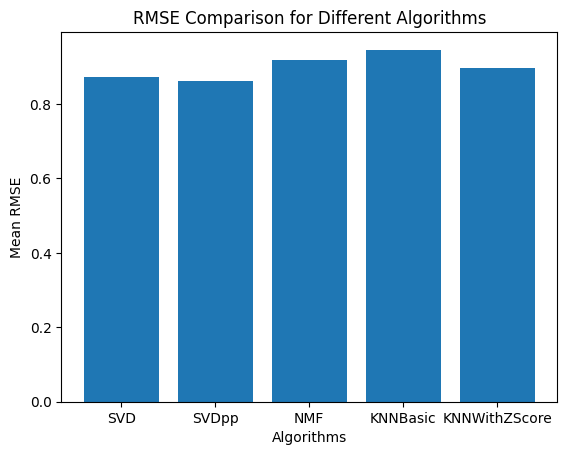

The best algorithm is SVDpp with RMSE of 0.8611905596308134


TypeError: list indices must be integers or slices, not str

In [1]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp, NMF, KNNBasic, KNNWithZScore
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Вибір алгоритмів
algorithms = [SVD(), SVDpp(), NMF(), KNNBasic(), KNNWithZScore()]

# Крос-валідація та підбір параметрів
results = {}
for algo in algorithms:
    results[algo.__class__.__name__] = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# Візуалізація результатів
rmse_values = {algo_name: results[algo_name]['test_rmse'].mean() for algo_name in results}
plt.bar(rmse_values.keys(), rmse_values.values())
plt.xlabel('Algorithms')
plt.ylabel('Mean RMSE')
plt.title('RMSE Comparison for Different Algorithms')
plt.show()

# Вибір найкращого алгоритму
best_algorithm = min(rmse_values, key=rmse_values.get)
print(f"The best algorithm is {best_algorithm} with RMSE of {rmse_values[best_algorithm]}")

# Застосування найкращого алгоритму для рекомендацій
best_algo = algorithms[best_algorithm]
trainset = data.build_full_trainset()
best_algo.fit(trainset)

# Рекомендації для конкретного користувача, наприклад, користувача з ID=1
user_id = 1
user_movies = ratings[ratings['userId'] == user_id]['movieId']
unseen_movies = [movie for movie in movies['movieId'] if movie not in user_movies]
predictions = [best_algo.predict(user_id, movie) for movie in unseen_movies]
top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:10]

print(f"Top 10 movie recommendations for user {user_id}:")
for prediction in top_predictions:
    movie_info = movies[movies['movieId'] == prediction.iid]
    print(f"{movie_info['title'].values[0]} (ID: {prediction.iid}), Estimated Rating: {prediction.est}")
